In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [6]:
image = cv2.imread("images/lane.png")
edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.Canny(edge_image, 100, 200)

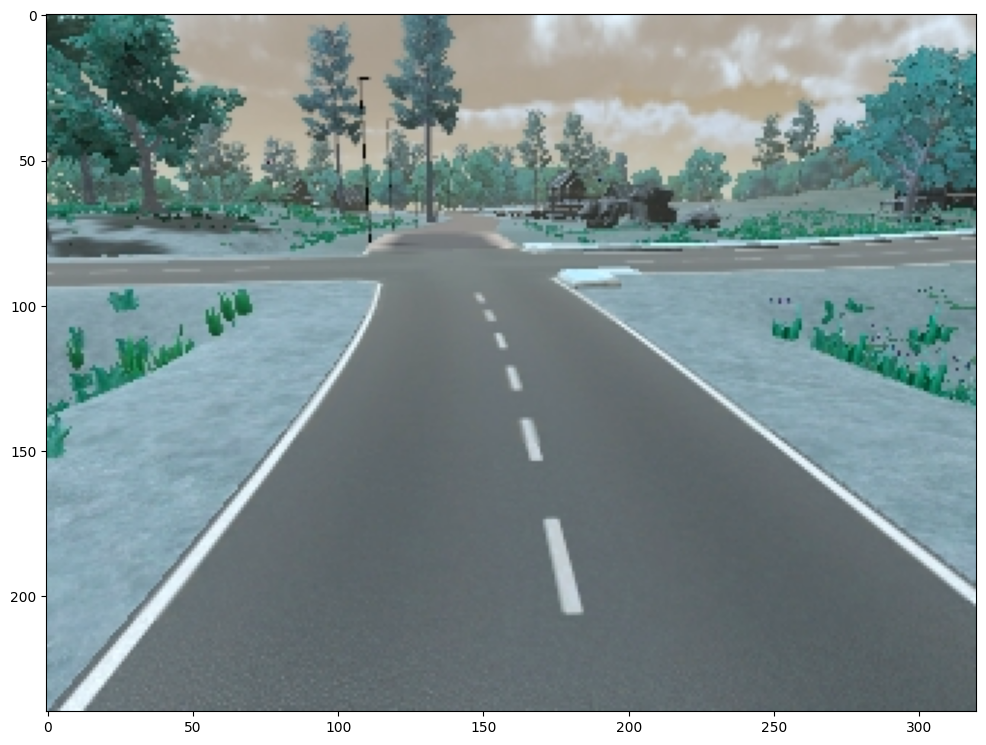

In [9]:
figure = plt.figure(figsize=(12, 12))
plt.imshow(image)

In [20]:
edge_height, edge_width = edge_image.shape[:2]
edge_height_half, edge_width_half = edge_height / 2, edge_width / 2
#
d = np.sqrt(np.square(edge_height) + np.square(edge_width))
dtheta = 180 / 180
drho = (2 * d) / 180
#
thetas = np.arange(0, 180, step=dtheta)
rhos = np.arange(-d, d, step=drho)
cos_thetas = np.cos(np.deg2rad(thetas))
sin_thetas = np.sin(np.deg2rad(thetas))
accumulator = np.zeros((len(rhos), len(rhos)))

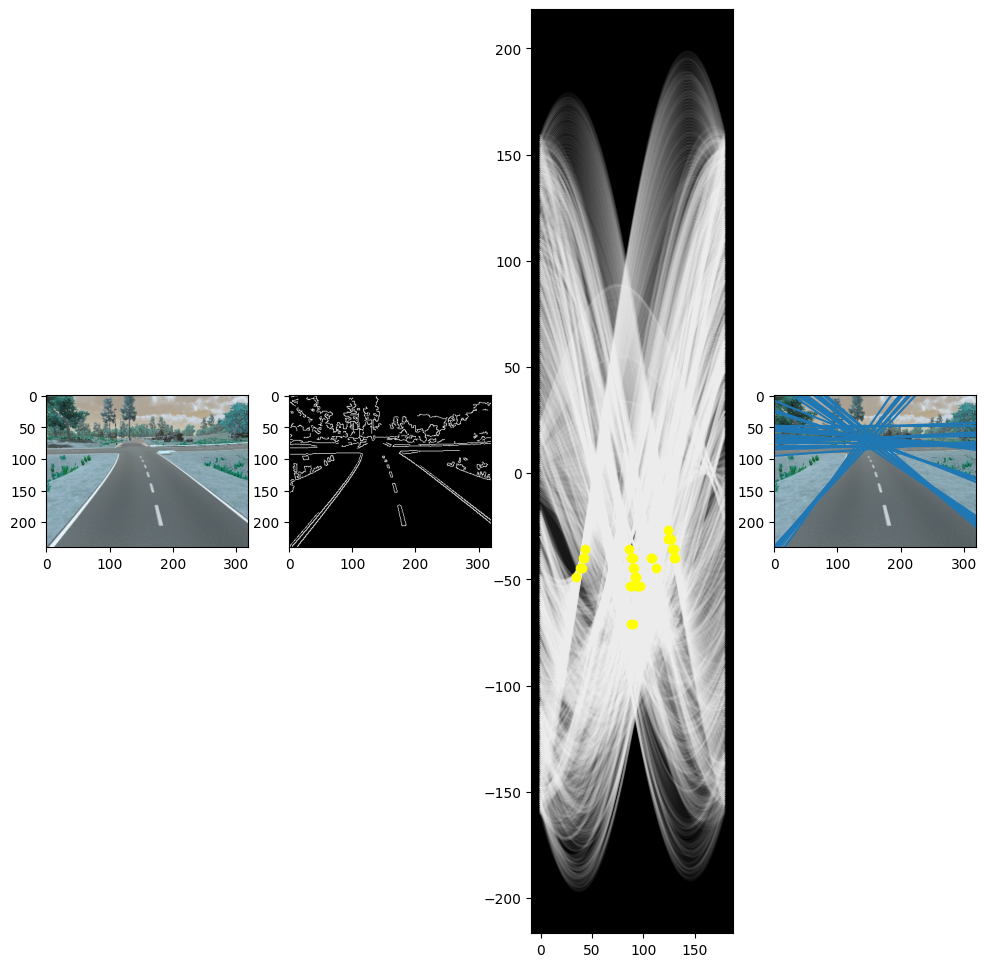

In [43]:
figure = plt.figure(figsize=(12, 12))
subplot1 = figure.add_subplot(1, 4, 1)
subplot1.imshow(image)
subplot2 = figure.add_subplot(1, 4, 2)
subplot2.imshow(edge_image, cmap="gray")
subplot3 = figure.add_subplot(1, 4, 3)
subplot3.set_facecolor((0, 0, 0))
subplot4 = figure.add_subplot(1, 4, 4)
subplot4.imshow(image)

for y in range(edge_height):
    for x in range(edge_width):
        if edge_image[y][x] != 0:
            edge_point = [y - edge_height_half, x - edge_width_half]
            ys, xs = [], []
            for theta_idx in range(len(thetas)):
                rho = (edge_point[1] * cos_thetas[theta_idx]) + (edge_point[0] * sin_thetas[theta_idx])
                theta = thetas[theta_idx]
                rho_idx = np.argmin(np.abs(rhos - rho))
                accumulator[rho_idx][theta_idx] += 1
                ys.append(rho)
                xs.append(theta)
            subplot3.plot(xs, ys, color="white", alpha=0.05)
for y in range(accumulator.shape[0]):
    for x in range(accumulator.shape[1]):
        if accumulator[y][x] > 5200:
            rho = rhos[y]
            theta = thetas[x]
            a = np.cos(np.deg2rad(theta))
            b = np.sin(np.deg2rad(theta))
            x0 = (a * rho) + edge_width_half
            y0 = (b * rho) + edge_height_half
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            subplot3.plot([theta], [rho], marker='o', color="yellow")
            subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))